# Data Cleansing Tutorial: Car Survey Data
This notebook demonstrates how to clean and analyze messy car survey data collected by pupils. We'll use pandas for data cleaning and matplotlib for visualization.

## 1. Import Required Libraries
Let's start by importing the libraries we'll need for data cleaning and visualization.

**Question:** What libraries do we need to load, clean, and visualize our data in Python?

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load and Explore Dataset
Let's load one of the dirty data CSV files and take an initial look at the data.

**Question:** What does our raw data look like, and what kinds of issues can we spot at first glance?

In [41]:
# Load the dirty data CSV file
df = pd.read_csv('dirty_data1.csv')
df.head()

,Car Colour,Date,Occupants,Make,Model
0,Red,2023-03-15,2,Ford,Focus
1,rEd,15/03/2023,three,Toyta,Corolla
2,NaN,"March 15, 2023",4,Volkswagen,Golf
3,rd,2023/03/15,2,cyclist,NaN
4,Blue,2023-03-16,one,Honda,Civic


In [42]:
# Check for missing values and data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Car Colour  112 non-null    object
 1   Date        136 non-null    object
 2   Occupants   124 non-null    object
 3   Make        135 non-null    object
 4   Model       111 non-null    object
dtypes: object(5)
memory usage: 5.4+ KB


Car Colour    24
Date           0
Occupants     12
Make           1
Model         25
dtype: int64

**Question:** How can we handle missing or unknown data to ensure our dataset is complete for analysis?

In [ ]:
# Fill missing values with 'unknown' for categorical columns and drop rows with missing Occupants
for col in ['Car Colour', 'Make', 'Model']:
    df[col] = df[col].fillna('unknown')
# For Occupants, drop rows with missing values (since we need this for analysis)
df = df.dropna(subset=['Occupants'])

# Show that the data is now complete
df.info()
df.isnull().sum()

## 3. Data Preprocessing
Let's clean the data by fixing inconsistent values, handling missing data, and removing non-car entries.

**Question:** How can we clean and standardize our data to make it ready for analysis?

In [17]:
# Clean car colour column
colour_map = {'red': 'Red', 'rEd': 'Red', 'Red': 'Red', 'redd': 'Red', 'rd': 'Red',
              'blue': 'Blue', 'blu': 'Blue', 'BlUe': 'Blue',
              'green': 'Green', 'grn': 'Green'}
df['Car Colour'] = df['Car Colour'].str.strip().str.lower().map(colour_map).fillna(df['Car Colour'])

# Standardize date formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Clean occupants column
occupant_map = {'one': 1, 'two': 2, 'three': 3, 'four': 4}
def clean_occupants(x):
    if pd.isnull(x): return np.nan
    x = str(x).strip().lower()
    return occupant_map.get(x, pd.to_numeric(x, errors='coerce'))
df['Occupants'] = df['Occupants'].apply(clean_occupants)

# Remove non-car entries
non_cars = ['cyclist', 'motorbike', 'bike']
df = df[~df['Make'].str.lower().isin(non_cars)]

df.head()

,Car Colour,Date,Occupants,Make,Model
0,Red,2023-03-15,2.0,Ford,Focus
1,Red,NaT,3.0,Toyta,Corolla
2,NaN,NaT,4.0,Volkswagen,Golf
4,Blue,2023-03-16,1.0,Honda,Civic
5,Blue,NaT,1.0,Hyundai,Elantra


## 4. Feature Engineering
Let's create a new feature: a flag for cars with more than 2 occupants.

**Question:** Can we create new features from our cleaned data to help answer more complex questions?

In [18]:
# Create a new feature: more_than_2_occupants
df['More Than 2 Occupants'] = df['Occupants'] > 2
df.head()

,Car Colour,Date,Occupants,Make,Model,More Than 2 Occupants
0,Red,2023-03-15,2.0,Ford,Focus,False
1,Red,NaT,3.0,Toyta,Corolla,True
2,NaN,NaT,4.0,Volkswagen,Golf,True
4,Blue,2023-03-16,1.0,Honda,Civic,False
5,Blue,NaT,1.0,Hyundai,Elantra,False


## 5. Data Visualization
Let's visualize the cleaned data to gain insights.

**Question:** What patterns or trends can we discover by visualizing our cleaned data?

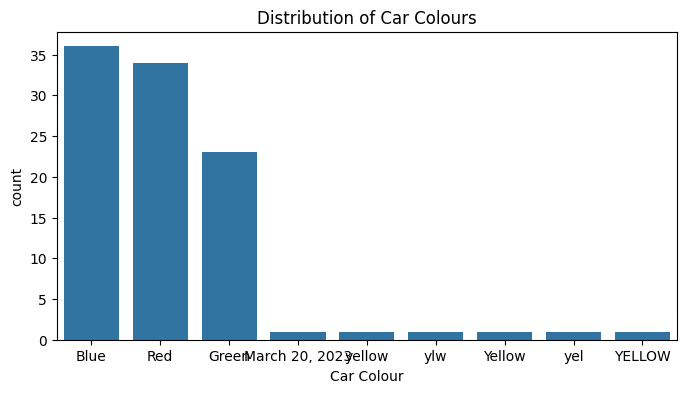

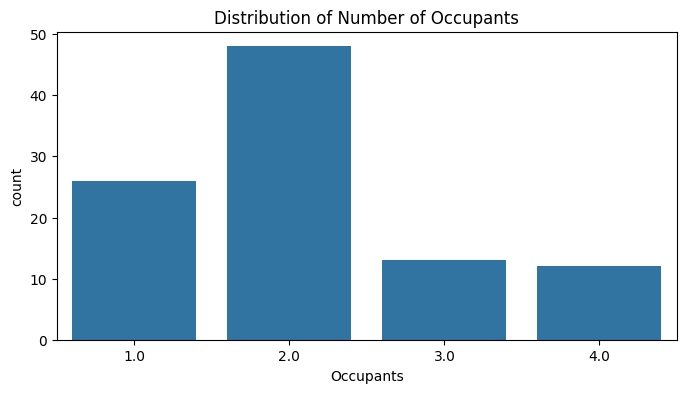

In [19]:
# Plot the distribution of car colours
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Car Colour', order=df['Car Colour'].value_counts().index)
plt.title('Distribution of Car Colours')
plt.show()

# Plot the distribution of number of occupants
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Occupants')
plt.title('Distribution of Number of Occupants')
plt.show()

## 6. Summary and Next Steps
In this tutorial, we loaded messy survey data, cleaned it using pandas, and visualized the results with matplotlib and seaborn. You can try repeating the process with the other CSV files, or experiment with more advanced cleaning techniques!

## 7. Key Questions to Answer with Our Traffic Data

Let's use our cleaned data to answer some important questions:

1. What is the most popular car type?
2. Which car model carried the most occupants?
3. What was the busiest day for traffic?
4. Can we visualize the number of vehicles per day?

We'll answer these questions using our combined and cleaned dataset.

**Question:** What key questions can we now answer with our fully cleaned and combined traffic data?

## 7. Combine Data from Multiple Groups

Let's now combine all three class group CSV files into a single DataFrame, adding a new column to indicate which group collected each set. This allows us to quickly apply the same cleaning workflow to new data as it arrives.

**Why use rules for cleaning?**
- Rule-based cleaning (using code) is repeatable, scalable, and less error-prone than manually sorting or editing the source data each time.
- It ensures consistency and saves time as new data is added or updated.
- You can easily update or improve your cleaning logic in one place, rather than fixing each file by hand.

**Question:** How can we combine data from multiple groups and ensure consistent cleaning across all sources?

In [31]:
# Load all three CSVs and add a group column to each
alpha = pd.read_csv('dirty_data1.csv')
beta = pd.read_csv('dirty_data2.csv')
gamma = pd.read_csv('dirty_data3.csv')

alpha['Group'] = 'Alpha'
beta['Group'] = 'Beta'
gamma['Group'] = 'Gamma'

# Combine into a single DataFrame
all_data = pd.concat([alpha, beta, gamma], ignore_index=True)
all_data.head()

,Car Colour,Date,Occupants,Make,Model,Group
0,Red,2023-03-15,2,Ford,Focus,Alpha
1,rEd,15/03/2023,three,Toyta,Corolla,Alpha
2,NaN,"March 15, 2023",4,Volkswagen,Golf,Alpha
3,rd,2023/03/15,2,cyclist,NaN,Alpha
4,Blue,2023-03-16,one,Honda,Civic,Alpha


In [33]:
# Clean occupant numbers
occupant_map = {'one': 1, 'two': 2, 'three': 3, 'four': 4}
def clean_occupants(x):
    if pd.isnull(x): return np.nan
    x = str(x).strip().lower()
    return occupant_map.get(x, pd.to_numeric(x, errors='coerce'))
all_data['Occupants'] = all_data['Occupants'].apply(clean_occupants)

# Remove rows with NaN in Occupants
all_data = all_data.dropna(subset=['Occupants'])

# Clean car colours to all uppercase
all_data['Car Colour'] = all_data['Car Colour'].astype(str).str.strip().str.upper()

all_data.head()

,Car Colour,Date,Occupants,Make,Model,Group
0,RED,2023-03-15,2.0,Ford,Focus,Alpha
1,RED,15/03/2023,3.0,Toyta,Corolla,Alpha
2,NAN,"March 15, 2023",4.0,Volkswagen,Golf,Alpha
3,RD,2023/03/15,2.0,cyclist,NaN,Alpha
4,BLUE,2023-03-16,1.0,Honda,Civic,Alpha


In [34]:
# Replace NaN with 'unknown' in all columns
all_data = all_data.fillna('unknown')

# Fix car colours where 'RD' means 'RED'
all_data['Car Colour'] = all_data['Car Colour'].replace({'RD': 'RED'})

all_data.head()

,Car Colour,Date,Occupants,Make,Model,Group
0,RED,2023-03-15,2.0,Ford,Focus,Alpha
1,RED,15/03/2023,3.0,Toyta,Corolla,Alpha
2,NAN,"March 15, 2023",4.0,Volkswagen,Golf,Alpha
3,RED,2023/03/15,2.0,cyclist,unknown,Alpha
4,BLUE,2023-03-16,1.0,Honda,Civic,Alpha


In [35]:
# List all unique car colours to help build cleaning rules
print('Unique car colours:')
print(all_data['Car Colour'].unique())

Unique car colours:
['RED' 'NAN' 'BLUE' 'BLU' 'GREEN' 'GRN' 'YELLOW' 'YLW' 'YEL']


In [36]:
# Further clean car colour values
all_data['Car Colour'] = all_data['Car Colour'].replace({
    'BLU': 'BLUE',
    'GRN': 'GREEN',
    'YLW': 'YELLOW',
    'YEL': 'YELLOW'
})

print('Updated car colours:')
print(all_data['Car Colour'].unique())

Updated car colours:
['RED' 'NAN' 'BLUE' 'GREEN' 'YELLOW']


In [37]:
# List all unique makes and models to help build cleaning rules
print('Unique makes:')
print(all_data['Make'].unique())
print('\nUnique models:')
print(all_data['Model'].unique())

# Example: Standardize some common make/model typos or variants
all_data['Make'] = all_data['Make'].replace({
    'TOYTA': 'TOYOTA',
    'VW': 'VOLKSWAGEN',
    'BMW ': 'BMW',  # Remove trailing spaces
    'HYUNDAI ': 'HYUNDAI'
}).astype(str).str.strip().str.upper()

all_data['Model'] = all_data['Model'].replace({
    'PASSAT ': 'PASSAT',  # Remove trailing spaces
    'GOLF ': 'GOLF',
    'I30': 'I 30',  # Example of spacing fix
}).astype(str).str.strip().str.upper()

print('Updated makes:')
print(all_data['Make'].unique())
print('\nUpdated models:')
print(all_data['Model'].unique())

Unique makes:
['Ford' 'Toyta' 'Volkswagen' 'cyclist' 'Honda' 'Hyundai' 'Motorbike'
 'Peugeot' 'Renault' 'Skoda' 'Toyota']

Unique models:
['Focus' 'Corolla' 'Golf' 'unknown' 'Civic' 'Elantra' '208' 'Clio'
 'Fiesta' 'Passat' 'i30' '308' 'Megane' 'Octavia']
Updated makes:
['FORD' 'TOYTA' 'VOLKSWAGEN' 'CYCLIST' 'HONDA' 'HYUNDAI' 'MOTORBIKE'
 'PEUGEOT' 'RENAULT' 'SKODA' 'TOYOTA']

Updated models:
['FOCUS' 'COROLLA' 'GOLF' 'UNKNOWN' 'CIVIC' 'ELANTRA' '208' 'CLIO'
 'FIESTA' 'PASSAT' 'I30' '308' 'MEGANE' 'OCTAVIA']


Now that we've combined the data, we can apply our cleaning workflow to the entire dataset at once. This approach makes it easy to process new data from any group, and ensures all data is cleaned consistently using the same rules. Notice how quickly we can repeat the cleaning process for new or additional data sets!

Most popular car make: FORD


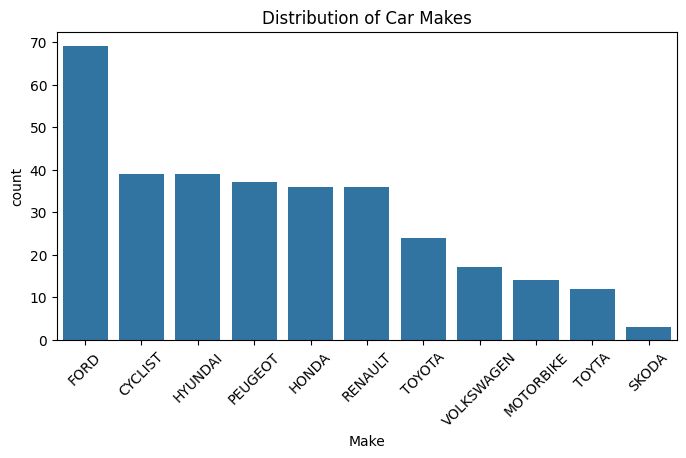

Car model with most total occupants: FOCUS


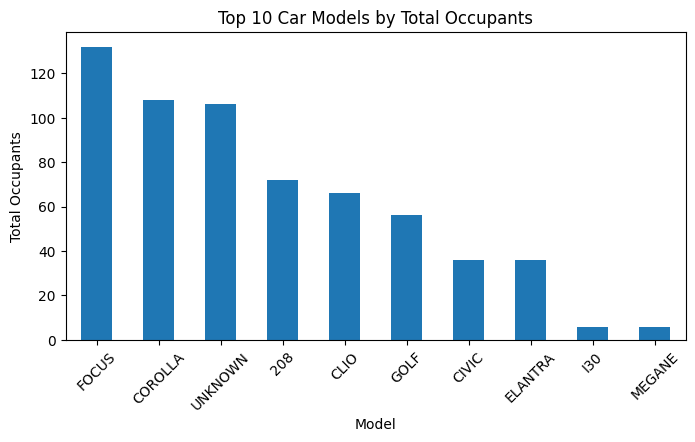

Busiest day for traffic: 2023-03-15


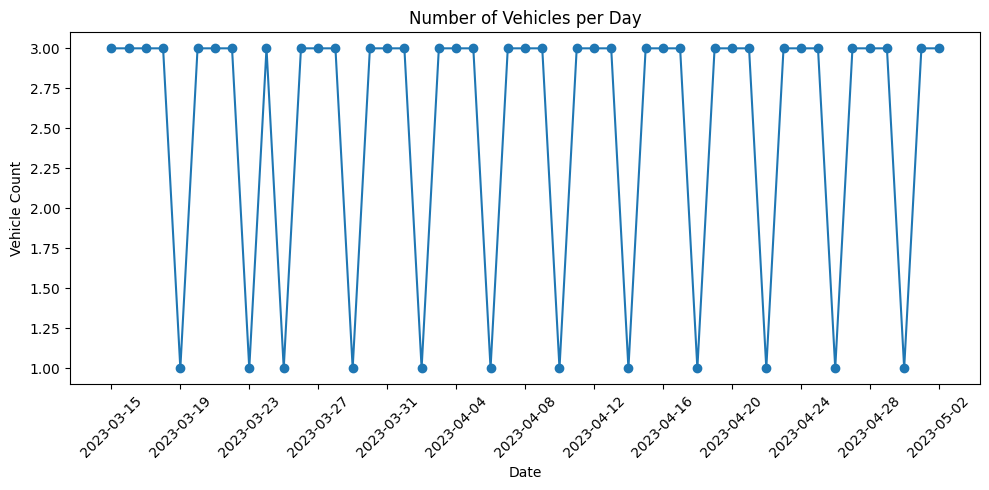

In [39]:
# 1. What is the most popular car type (Make)?
most_popular_make = all_data['Make'].value_counts().idxmax()
print(f"Most popular car make: {most_popular_make}")

plt.figure(figsize=(8,4))
sns.countplot(data=all_data, x='Make', order=all_data['Make'].value_counts().index)
plt.title('Distribution of Car Makes')
plt.xticks(rotation=45)
plt.show()

# 2. Which car model carried the most occupants (total, not per car)?
model_occupants = all_data.groupby('Model')['Occupants'].sum().sort_values(ascending=False)
most_occupants_model = model_occupants.idxmax()
print(f"Car model with most total occupants: {most_occupants_model}")

plt.figure(figsize=(8,4))
model_occupants.head(10).plot(kind='bar')
plt.title('Top 10 Car Models by Total Occupants')
plt.ylabel('Total Occupants')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# 3. What was the busiest day for traffic?
if 'Date' in all_data.columns:
    all_data['Date'] = pd.to_datetime(all_data['Date'], errors='coerce')
    day_counts = all_data['Date'].dt.date.value_counts().sort_index()
    busiest_day = day_counts.idxmax()
    print(f"Busiest day for traffic: {busiest_day}")
else:
    print("No 'Date' column found in data.")

# 4. Visualize the number of vehicles per day (improved chart)
if 'Date' in all_data.columns:
    plt.figure(figsize=(10,5))
    day_counts_sorted = day_counts.sort_index()
    plt.plot(day_counts_sorted.index, day_counts_sorted.values, marker='o')
    plt.title('Number of Vehicles per Day')
    plt.ylabel('Vehicle Count')
    plt.xlabel('Date')
    # Show only every Nth date label to reduce clutter
    N = max(1, len(day_counts_sorted)//10)
    plt.xticks(day_counts_sorted.index[::N], rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'Date' column found in data.")